In [ ]:
#######################
# CONFIG ZONE
#######################

# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from tools.helpers import (
    get_column_uniques,
    get_column_uniques_count,
    plot_grouped_by_category_barh_charts,
    barh_chart_unique_values,
    print_unique_normalized_values_by_group,
    make_horizontal_grouped_chart,
    make_vertical_grouped_chart,
    grouped_grid_pie_chart,
    grouped_grid_barh_chart,
    create_grouped_dataframe_list,
    uniques_count_to_dataframe,
    barh_chart_normal_count,
)


%matplotlib inline

# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [1]:
df = pd.read_csv("../data/data_fixed.csv")

In [2]:
df = df.drop("Unnamed: 0", axis=1)
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [3]:
df = df.dropna()

### 2. **Employment and Work Conditions**
   - Modalidad de trabajo
   - Modalidad de empleo
   - Puesto / rol
   - ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?
   - ¿Codificás por trabajo?
   - ¿Qué nivel te asignaron en tu trabajo?
   - ¿Cuál considerás que es tu nivel en tu puesto?


## Modalidad de trabajo


In [4]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [5]:
get_column_uniques(df, "work_mode")

['remote', 'none', 'Hibrído', 'onsite']

In [6]:
for k, v in enumerate(get_column_uniques_count(df, "work_mode")):
    print(v)

4
1
1
1


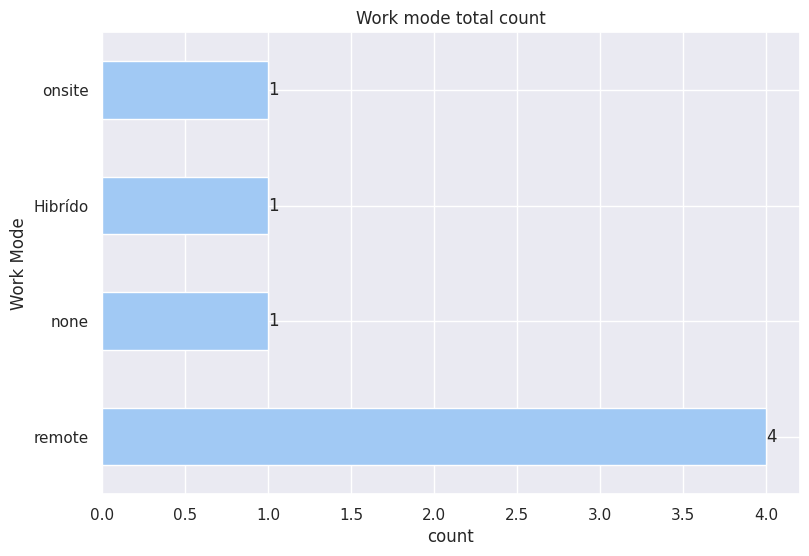

In [7]:
barh_chart_normal_count(
    df, "work_mode", title="Work mode total count", xlabel="count", ylabel="Work Mode"
)

## Modalidad de empleo


In [8]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

## Puesto / rol


In [10]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [17]:
# Assuming get_column_uniques_count returns a Series object
role_counts = get_column_uniques_count(df, "role")

role_counts_df = uniques_count_to_dataframe(role_counts, 10)

In [18]:
role_counts_df

,role,count
0,backend_dev,2
1,mobile_dev,2
2,backend_arch,1
3,db_admin,1
4,data_eng,1
5,quality_analyst,1
6,frontend_dev,1


## ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?


In [19]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [20]:
get_column_uniques(df, "prog_skills_in_role")

['devops_dataops',
 'scientific_researcher',
 'sys_admin',
 'designer',
 'educator']

In [21]:
# Get column uniques.
prog_in_rol_uniques = get_column_uniques(df, "prog_skills_in_role")

In [22]:
prog_in_rol_uniques

['devops_dataops',
 'scientific_researcher',
 'sys_admin',
 'designer',
 'educator']

In [32]:
# Obtenemos el conteo total por categoria.
prog_in_role_count = get_column_uniques_count(df, "prog_skills_in_role")
prog_in_role_df = uniques_count_to_dataframe(prog_in_role_count, 10)

In [33]:
prog_in_role_df.columns

Index(['role', 'count'], dtype='object')

## ¿Codificás por trabajo?


In [35]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [36]:
# Unique values in column.
get_column_uniques(df, "code_for_job")

['Yes', 'No']

In [38]:
get_column_uniques_count(df, "code_for_job")

code_for_job
Yes    5
No     2
Name: count, dtype: int64

## ¿Qué nivel te asignaron en tu trabajo?


In [39]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [40]:
# Get unique values in column.
get_column_uniques(df, "assigned_seniority")

['Senior', 'Principal', 'No aplica a mi lugar de trabajo', 'Junior']

In [41]:
get_column_uniques_count(df, "assigned_seniority")

assigned_seniority
Senior                             3
No aplica a mi lugar de trabajo    2
Principal                          1
Junior                             1
Name: count, dtype: int64

## ¿Cuál considerás que es tu nivel en tu puesto?


In [43]:
# Obtener los valores unicos de la columna.
get_column_uniques(df, "self_assessed_seniority")

['Senior', 'Principal', 'Mid-senior', 'Junior']

In [44]:
# Obtener el conteo total de la columns.

In [45]:
get_column_uniques_count(df, "self_assessed_seniority")

self_assessed_seniority
Senior        2
Mid-senior    2
Junior        2
Principal     1
Name: count, dtype: int64